<a href="https://colab.research.google.com/github/sanuli21/telco-churn-project/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
folders = ["notebooks", "data", "reports", "models"]
for folder in folders:
  if not os.path.exists(folder):
    os.makedirs(folder)
    print(f"{folder} created")
  else:
    print(f"Folder already exists: {folder}")
print("Folders ready.")

notebooks created
data created
reports created
models created
Folders ready.


In [2]:
from google.colab import files
upload = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
import shutil
#moving uploaded CSV to data folder
shutil.move("telco.csv", "data/telco.csv")
print("Dataset moved to data/folder")

Dataset moved to data/folder


In [4]:
#importing basic libraries
import pandas as pd
import numpy as np

#to ignore warnings to keep notebook clean
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported.")

Libraries imported.


In [5]:
#loading dataset
data_path = "data/telco.csv"
df = pd.read_csv(data_path)

print("Dataset loaded")
print("\nFirst 5 rows: \n", df.head())


Dataset loaded

First 5 rows: 
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Stre

In [6]:
# Basic dataset info
print("Dataset Shape: ", df.shape)
df.info()
df.describe()

Dataset Shape:  (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
#checking for missing values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
empty_totalcharges = df[df['TotalCharges'].str.strip() == '']
print("No of empty totalCharges: ", len(empty_totalcharges))
print(empty_totalcharges)

No of empty totalCharges:  11
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             

In [9]:
#Filling the 11 TotalCharges which has empty strings with 0 as they become NaNs when converted to Numeric if not handled

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)
print("Missing values now: ", df['TotalCharges'].isnull().sum())


Missing values now:  0


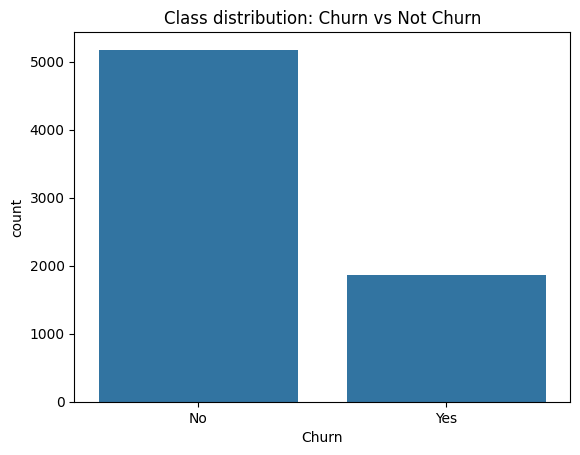

,proportion
Churn,
No,73.463013
Yes,26.536987


In [10]:
# Check distribution of target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title("Class distribution: Churn vs Not Churn")
plt.show()

df['Churn'].value_counts(normalize=True) * 100


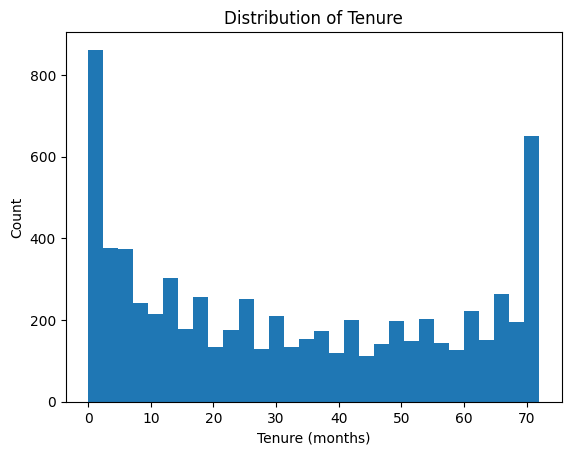

In [11]:
#visulaize tenure distibution
plt.hist(df['tenure'], bins=30) #using 30 so it gives a detailed shape of the distribution
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()


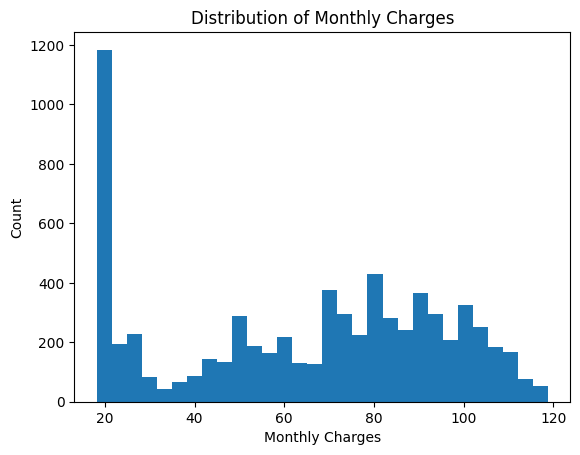

In [12]:
#monthly charges distribution

plt.hist(df['MonthlyCharges'], bins=30)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

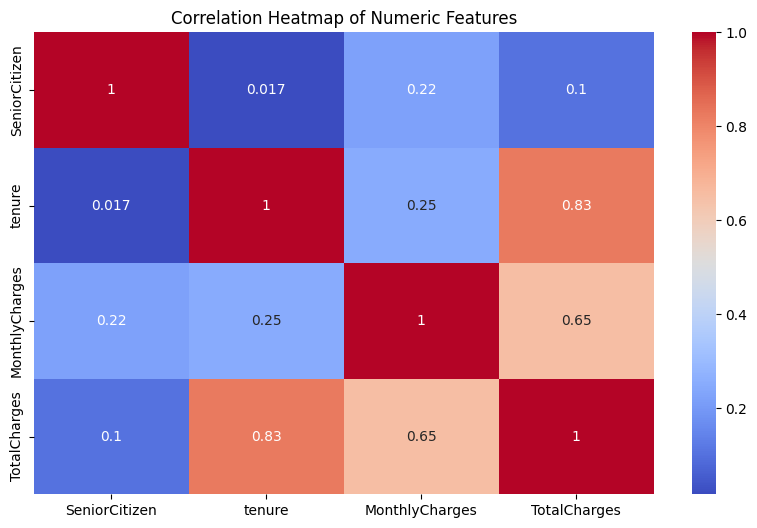

In [13]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

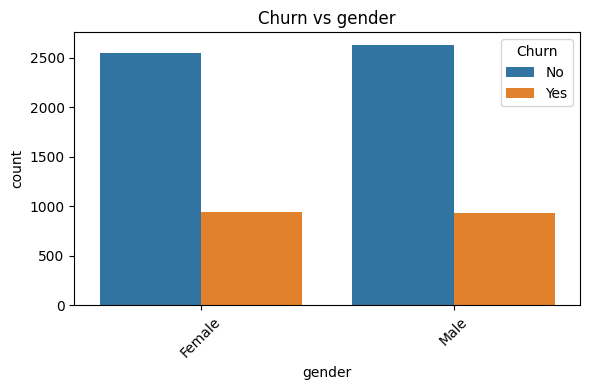

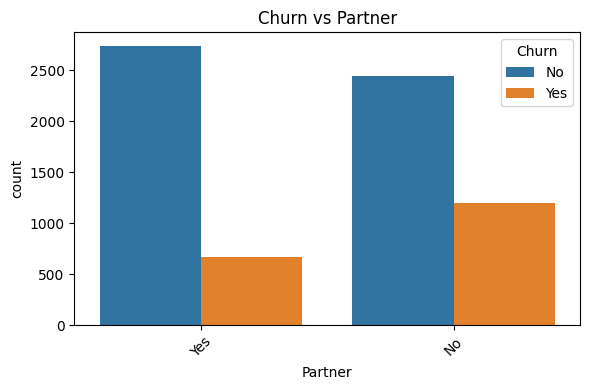

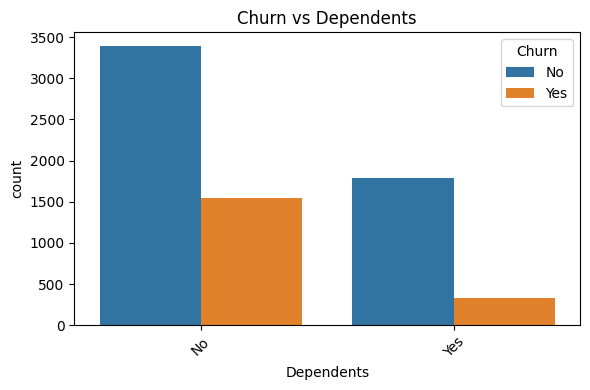

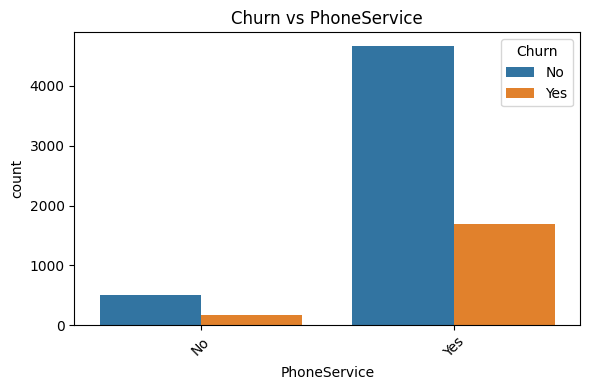

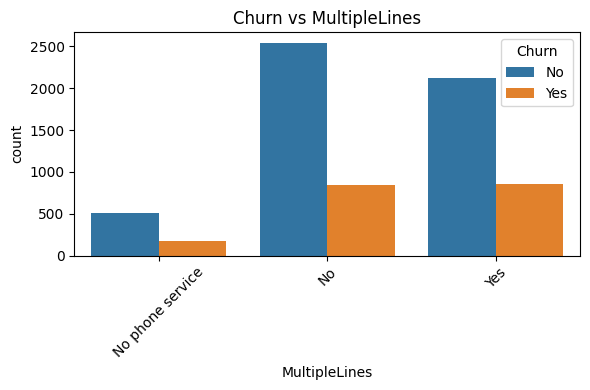

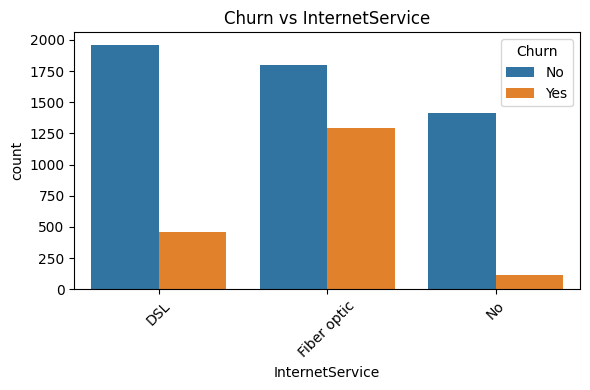

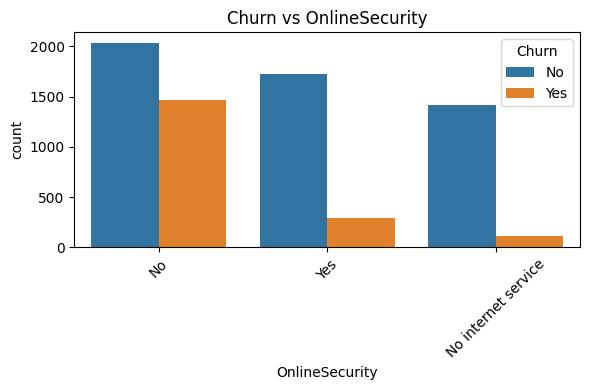

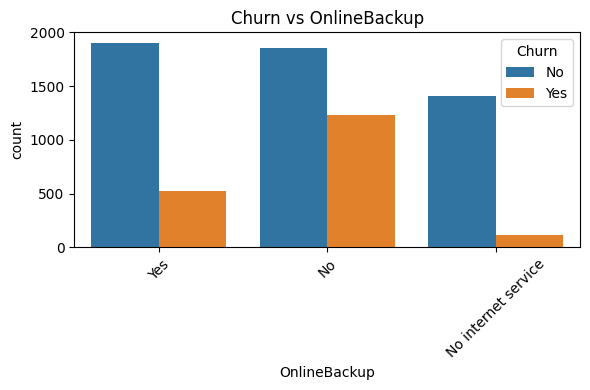

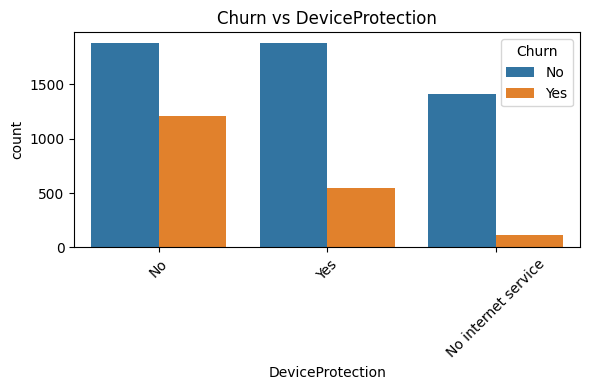

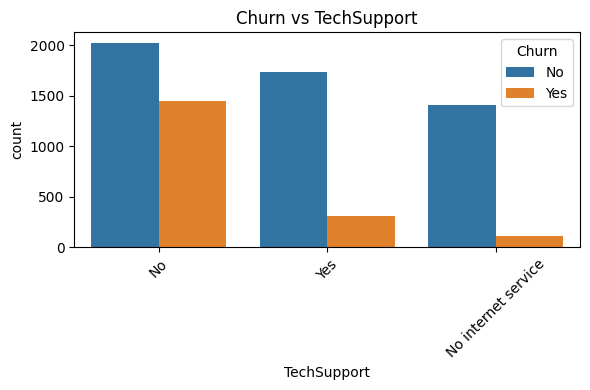

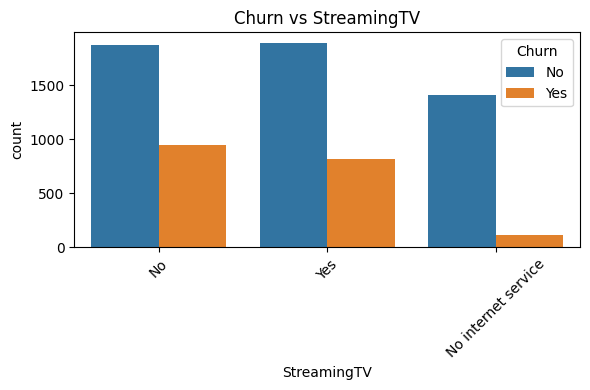

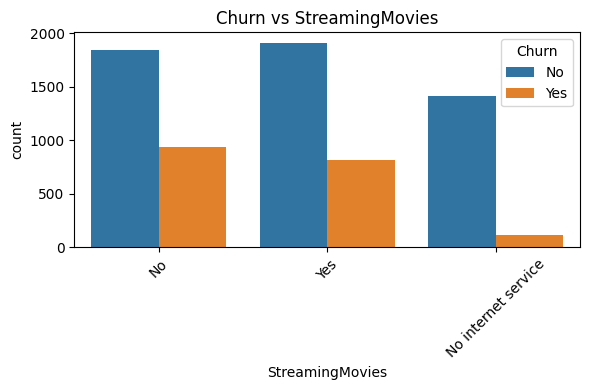

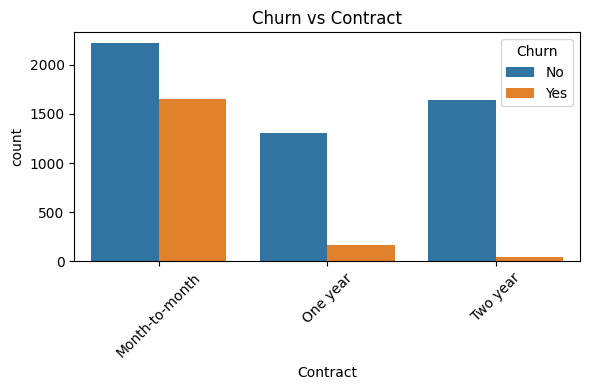

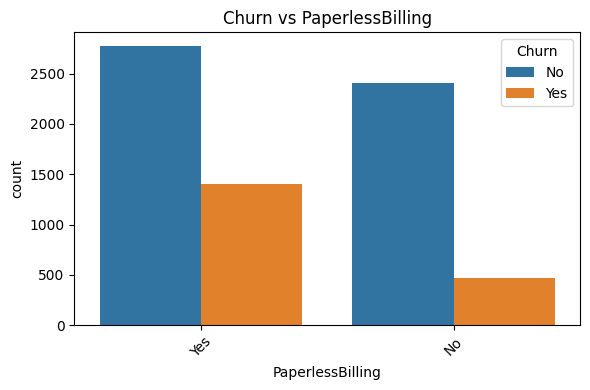

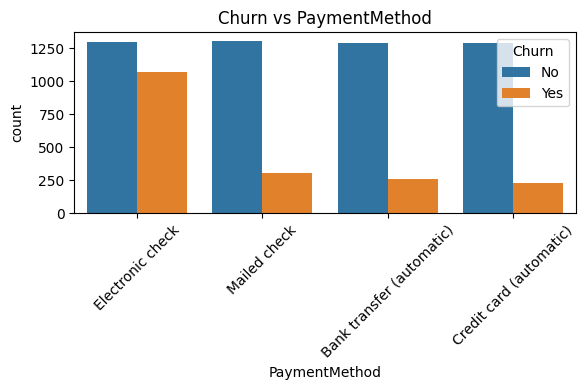

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns #picking all columns that are strings

for col in categorical_cols: #creating one chart per categorical fetaure
  if col not in ['customerID', 'Churn']: #as CustomerID is unique for every row
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"Churn vs {col}")
    plt.xticks(rotation=45) #to rotate labels if long
    plt.tight_layout()
    plt.show()

# EDA Insights Summary

#1. Dataset Overview
- 7,043 rows, 21 features.
- No severe missing values, except in **TotalCharges**, which was cleaned.

#2. Class Distribution
- Churn = 26.5%
- Not churn = 73.5%
- Dataset is imbalanced.

#3. Numerical Insights
- Customers with **high MonthlyCharges **tend to churn more.
- Customers with **low tenure** have significantly higher churn.

#4. Categorical Insights
- **Month-to-Month** contract - highest churn.
- **Electronic Check** users - high churn.
- **Fiber optic** internet users - higher churn
- Customers with **no partner / no dependants** - more churn.

#5. Key relationships
- **Contract type** is the strongest churn predictor.
- **Payment method**, **Internet service**, and tech-related add-ons also influence churn.

In [15]:
# Encoding categorical variables

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

#splitting features and traget
X = df.drop('Churn', axis = 1) #all features used to predict churn
y = df['Churn']

#encoding target variable(converting yes no of churn column to 1 and 0)
label_y = LabelEncoder()
y = label_y.fit_transform(y)

#identify categorical and numeric columns as categorical columns need one hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'customerID' in categorical_cols:
  categorical_cols.remove('customerID') #as it's just an idnetifier not a feature

#OneHotEncoder converts each category into a new column
preprocessor = ColumnTransformer( #ColumnTransformer apply OneHotEncoder only to categorical features and keep numeric features as they are
    transformers = [
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

X_encoded = preprocessor.fit_transform(X)

#convert to dataframe
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_cols = numeric_cols + list(encoded_cat_cols)
df_encoded = pd.DataFrame(X_encoded, columns=all_cols)

print("Categorical columns encoded successfully.")
df_encoded.head()

Categorical columns encoded successfully.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,2.0,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [16]:
# scale numeric features as ML models work better when all numeric features are on a similar scale

from sklearn.preprocessing import StandardScaler

#select numeric columns(all are numeric now)
numeric_cols_scaled = df_encoded.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df_encoded[numeric_cols_scaled] = scaler.fit_transform(df_encoded[numeric_cols_scaled])

print("Numeric features scaled.")

df_encoded.head()


Numeric features scaled.


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.992611,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,-0.439916,0.066327,-0.259629,-0.172165,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-0.439916,-1.236724,-0.362660,-0.958066,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,-0.439916,0.514251,-0.746535,-0.193672,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,-0.439916,-1.236724,0.197365,-0.938874,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,...,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807


In [17]:
# train-test split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, y, test_size=0.2, random_state=42, stratify=y
) # we use startify=y so that churn ratio stays the same in both sets

print("Train-test split done.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Train-test split done.
Training set shape: (5634, 30)
Testing set shape: (1409, 30)


In [20]:
# Train descision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = None,
    class_weight='balanced',
    random_state = 42
)

dt.fit(X_train, y_train) #training the model

y_pred_dt = dt.predict(X_test) #making predictions

#to evaluate performance
acc_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print("\nConfusion Matrix:\n", cm_dt)
print("\nClassification Report:\n", report_dt)

Decision Tree Accuracy: 0.7331

Confusion Matrix:
 [[852 183]
 [193 181]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1035
           1       0.50      0.48      0.49       374

    accuracy                           0.73      1409
   macro avg       0.66      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [21]:
# Hyperparameter tuning for decision tree using GridSearchCV

from sklearn.model_selection import GridSearchCV

# parameter grid to try
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion' : ['gini', 'entropy']
}

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

#grid search
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

#train final model using best params
dt_best = grid_search.best_estimator_

y_pred_dt_best = dt_best.predict(X_test)

acc_dt_best = accuracy_score(y_test, y_pred_dt_best)
cm_dt_best = confusion_matrix(y_test, y_pred_dt_best)
report_dt_best = classification_report(y_test, y_pred_dt_best)

print("\nTuned Desicion Tree Test Accuracy:", acc_dt_best)
print("\nConfusion Matrix:\n", cm_dt_best)
print("\nClassification Report:\n", report_dt_best)




Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.734820118486811

Tuned Desicion Tree Test Accuracy: 0.7366926898509581

Confusion Matrix:
 [[765 270]
 [101 273]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1035
           1       0.50      0.73      0.60       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409



In [27]:
# Build and train a neural netwrok model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

#determine no of features
input_dim = X_train.shape[1]

#calculate class weights for balancing
print("Calculating class weights for neural network...")
class_weights = compute_class_weight('balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: Non -churn (0) = {class_weight_dict[0]:.3f},"
f"Churn (1) = {class_weight_dict[1]/class_weight_dict[0]:.1f}x more weight")


#build the neural network model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#set up call backs for better training
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
        ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr = 0.00001,
        verbose=1
    )
]
print("\nStarting Neural Network training with class balancing...")
print("=" * 60)

#train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2, #20% of training data used to validate the model after each epoch
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

print("=" * 60)
print("Neural Network training complete.")

print(f"\nTraining Summary:")
print(f"Total epochs trained: {len(history.history['loss'])}")
print(f" Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f" Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f" Final training loss: {history.history['loss'][-1]:.4f}")
print(f" Final validation loss: {history.history['val_loss'][-1]:.4f}")

if len(history.history['loss']) < 100:
    print(f" Early stopping triggered at epoch {len(history.history['loss'])}")



Calculating class weighs for neural network...
Class weights: Non -churn (0) = 0.681,Churn (1) = 2.8x more weight

Starting Neural Network training with class balancing...
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6067 - loss: 0.6286 - val_accuracy: 0.7028 - val_loss: 0.5565 - learning_rate: 0.0010
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7456 - loss: 0.4956 - val_accuracy: 0.7232 - val_loss: 0.5294 - learning_rate: 0.0010
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7558 - loss: 0.4662 - val_accuracy: 0.6939 - val_loss: 0.5541 - learning_rate: 0.0010
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7611 - loss: 0.4635 - val_accuracy: 0.7152 - val_loss: 0.5297 - learning_rate: 0.0010
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7650 - loss: 0.4625 - val_accuracy: 0.7205 - val_loss: 0.5251 - learning_rate: 0.0010
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Nueral Network Test Accuracy: 0.7537260468417317

Confusion matrix:
[[785 250]
 [ 97 277]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1035
           1       0.53      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.75      0.76      1409



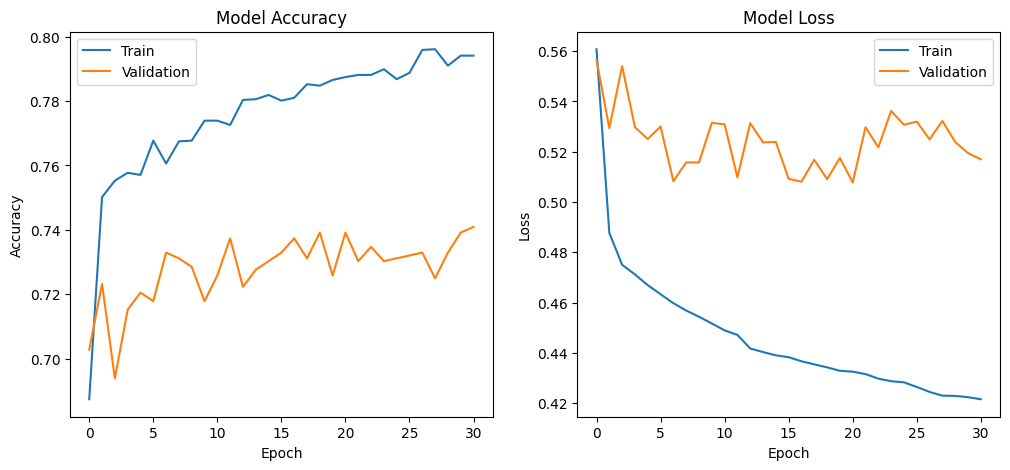

In [28]:
#Evaluate Neural network

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

#calculate the overall accuracy of the model on test data
nn_test_accuracy = accuracy_score(y_test, y_pred_nn)
print("Nueral Network Test Accuracy:", nn_test_accuracy)

#confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("\nConfusion matrix:")
print(cm_nn)

#classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

#plot training accuracy
plt.figure(figsize=(12,5))

#accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

#loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


In [31]:
# Model comparison table

print("\n" + "="*60)
print("Model Comparison Table - Both with class balancing")
print("="*60)

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_proba_dt_best = dt_best.predict_proba(X_test)[:,1]
y_proba_nn = model.predict(X_test).ravel()

#decision tree predictions
y_pred_dt_best = (y_proba_dt_best > 0.5).astype(int)

#neural network predictions
y_pred_nn = (y_proba_nn > 0.5).astype(int)

models = {
    'Decision Tree': (y_pred_dt_best, y_proba_dt_best),
    'Neural Network': (y_pred_nn, y_proba_nn)
}

rows = []

for name, (y_pred_m, y_proba_m) in models.items():
  rows.append({
      'model': name,
      'accuracy': f"{accuracy_score(y_test, y_pred_m):.1%}",
      'precision': f"{precision_score(y_test, y_pred_m):.1%}",
      'recall': f"{recall_score(y_test, y_pred_m):.1%}",
      'f1_score': f"{f1_score(y_test, y_pred_m):.3f}",
      'roc_auc': f"{roc_auc_score(y_test, y_proba_m):.3f}"
  })

df_final = pd.DataFrame(rows)
print(df_final.to_string(index=False))

df_final.to_csv('reports/final_model_comparison_balanced.csv', index=False)
print("\nSaved to: reports/final_model_comparison_balanced.csv")

df_final_numeric = pd.DataFrame([
    {
        'model': 'Decision Tree',
        'accuracy': accuracy_score(y_test, y_pred_dt_best),
        'precision': precision_score(y_test, y_pred_dt_best),
        'recall': recall_score(y_test, y_pred_dt_best),
        'f1_score': f1_score(y_test, y_pred_dt_best),
        'roc_auc': roc_auc_score(y_test, y_proba_dt_best)
    },
    {
        'model': 'Neural Network',
        'accuracy': accuracy_score(y_test, y_pred_nn),
        'precision': precision_score(y_test, y_pred_nn),
        'recall': recall_score(y_test, y_pred_nn),
        'f1_score': f1_score(y_test, y_pred_nn),
        'roc_auc': roc_auc_score(y_test, y_proba_nn)
    }
])

df_final_numeric.to_csv('reports/final_model_comparison_numeric_balanced.csv', index=False)



Model Comparison Table - Both with class balancing
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
         model accuracy precision recall f1_score roc_auc
 Decision Tree    73.7%     50.3%  73.0%    0.595   0.759
Neural Network    75.4%     52.6%  74.1%    0.615   0.830

Saved to: reports/final_model_comparison_balanced.csv


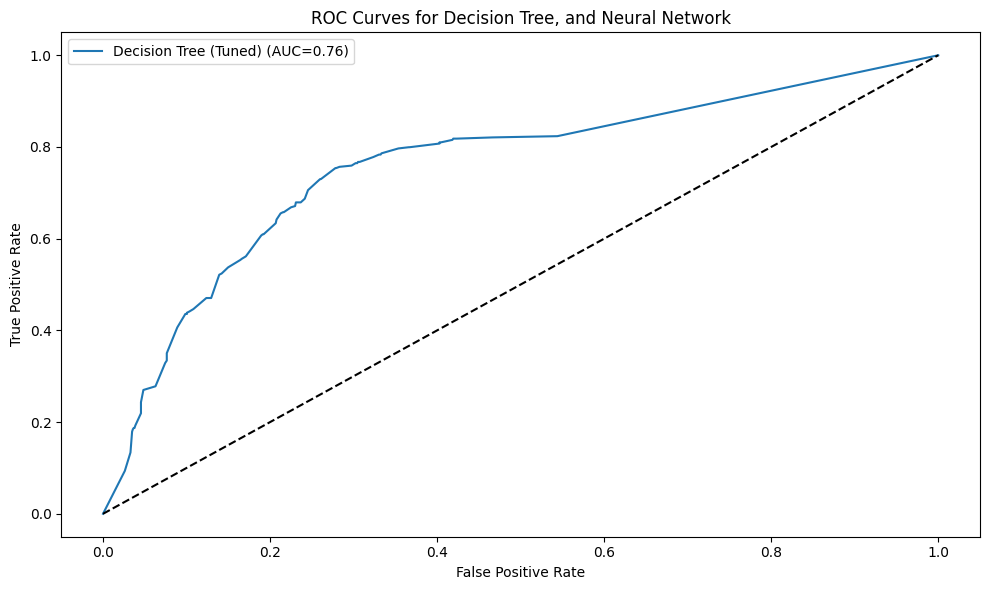

ROC Curve comparison figure saved to reports.roc_comparison.png


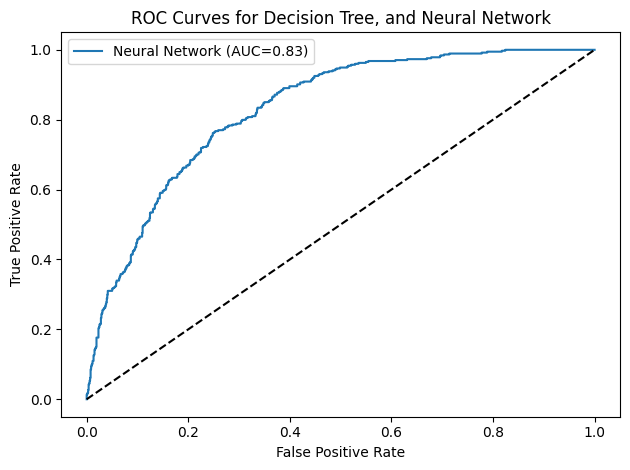

ROC Curve comparison figure saved to reports.roc_comparison.png


In [32]:
# ROC curves for all models

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

probas = {
    'Decision Tree (Tuned)': y_proba_dt_best,
    'Neural Network': y_proba_nn
}

plt.figure(figsize=(10,6))

for name, y_proba in probas.items():
  fpr, tpr, _ = roc_curve(y_test, y_proba)
  auc = roc_auc_score(y_test, y_proba)
  plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

  plt.plot([0,1], [0,1], 'k--')

  plt.title("ROC Curves for Decision Tree, and Neural Network")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.legend()
  plt.tight_layout()

  #save figure
  plt.savefig("reports/roc_comparison.png", dpi=300, bbox_inches='tight')
  plt.show()

  print("ROC Curve comparison figure saved to reports.roc_comparison.png")

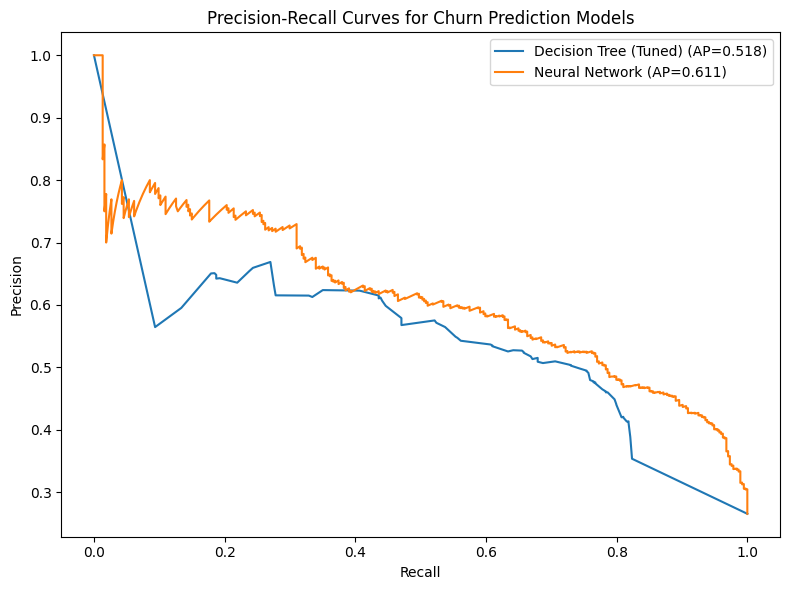

Precision-Recall curves saved to reports/pr_comparison.png


In [33]:
# precision recall curves
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

probas = {
    'Decision Tree (Tuned)': y_proba_dt_best,
    'Neural Network': y_proba_nn
}

for name, y_proba in probas.items():
  precision, recall, _ = precision_recall_curve(y_test, y_proba)
  ap = average_precision_score(y_test, y_proba)
  plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for Churn Prediction Models")
plt.legend()
plt.tight_layout()

plt.savefig("reports/pr_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print("Precision-Recall curves saved to reports/pr_comparison.png")


In [34]:
# Neural network threshold tuning
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_nn)

f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_idx = f1_scores.argmax()

best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print("Best threshold for neural network:", round(best_threshold, 4))
print("Best F1 score for neural network:", round(best_f1, 4))

y_pred_nn_tuned = (y_proba_nn >= best_threshold).astype(int)

from sklearn.metrics import classification_report
print("\nClassification Report (NN With Tuned Threshold):")
print(classification_report(y_test, y_pred_nn_tuned))


Best threshold for neural network: 0.4831
Best F1 score for neural network: 0.6223

Classification Report (NN With Tuned Threshold):
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



In [35]:
# saving models and predictions

import joblib
import numpy as np
import pandas as pd

#save models
joblib.dump(dt_best, "models/decision_tree_best.pkl")
model.save("models/neural_network.h5")

print("Models saved successfully.")

#save predictions
pred_df = pd.DataFrame({
    "actual": y_test,
    "DT_proba": y_proba_dt_best,
    "NN_proba": y_proba_nn
})

pred_df.to_csv("reports/model_predictions.csv", index=False)
print("Predictions saved to reports/model_predictions.csv")


Models saved successfully.
Predictions saved to reports/model_predictions.csv
